<img src="Bilder/ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Computational Physics I | FS 2022 </b><br>
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>
<a href="https://www.ost.ch/de/forschung-und-dienstleistungen/technik/systemtechnik/ice-institut-fuer-computational-engineering/"> Eastern Switzerland University of Applied Sciences OST | ICE </a>


# How long does it take to boil an egg?


Source: 
- Norwegian Centre of Excellence: [Finite difference methods for diffusion processes](http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html)
- Ashlee N. Ford, Versypt, Richard D. Braatz: [Analysis_of_finite_difference_discretization_schemes_for_diffusion_in_spheres_with_variable_diffusivity]( https://web.mit.edu/braatzgroup/analysis_of_finite_difference_discretization_schemes_for_diffusion_in_spheres_with_variable_diffusivity.pdf)



How long does it take to boil an egg? Theoretical prediction, based on a simple
adaptation of the solution to the exact thermal diffusion equation for a sphere,
is consistent with experiments. The experimental data are also used to estimate
an average value for the thermal diffusivity of an egg.

- The boiling of eggs to perfection is of delicious interest to many of us who enjoy well-cooked
hard-boiled eggs. 
- Unfortunately, unlike other food, one cannot tell whether an egg is cooked  just by looking at it externally, namely at its shell. But perhaps we can be satisfied if we are able to tell by looking at a watch? 
- So, how long does it take to boil an egg? 

Of course, the answer depends on what is meant by a boiled egg—very much like steak—some like it soft
and some like it hard.

Boiling an egg involves **non-steady thermal diffusion** where the temperature within the
egg is dependent on both time and position, and due to its geometry, an exact solution, if
available, will likely have complicated expressions. 

Based on an approximate solution, Roura
et al [1], who had asked the same question in the title, estimated that it takes about 13 min.

Here, we derive another formula for the time required to boil an egg and actually
measured the time experimentally. Our formula is a simple adaptation of the solution to the
exact thermal diffusion equation for a sphere [2].


- [1] [Roura P, Fort J and Saurina J 2000 How long does it take to boil an egg? A simple approach to the energy transfer
equation Eur. J. Phys. 21 95–100](https://iopscience.iop.org/article/10.1088/0143-0807/21/1/314)
- [2] [Unsworth J and Durate F J 1979 Heat diffusion in a solid sphere and Fourier theory: an elementary practical
example Am. J. Phys. 47 981–3](https://aapt.scitation.org/doi/10.1119/1.11601)


##  1. Transitions of the interior of an egg

What happens to the egg yolk and egg albumen, collectively known as the egg magma, as the temperature is raised? 

1. According to *Powrie and Nakai* [3], an egg begins to **denature from a semi-transparent colloid to an opaque white**, at around 60 ◦C. At 75 ◦C, 
2. the egg magma will attain a soft curd consistency and it toughens as the egg’s temperature rises to 87 ◦C, as the **denaturation of ovalbumin** (a major conjugated protein in the egg albumen which represents over 50% of the egg albumen) occurs from 79 ◦C to 84 ◦C. 
3. When the proteins in the egg denature, they lose their specific tertiary structures due to the breakage of hydrogen bonds and the uncoiling of polypeptide chains [3]. At the same time, they coagulate through chemical and physical bonding to form a threedimensional gel network, resulting in **increasing viscosity of the egg magma as temperature rises**. 
- In addition, the surface of the egg yolk will turn yellowish green as its **iron compounds react with the albumen** to form an iron–conalbumin complex. 

**In view of this information, the definition for a well-cooked hard-boiled egg is the condition when the egg magma solidifies to reach a tender but firm consistency, and before its solid yolk develops a greenish yellow discolouration.**


[3] [Powrie W D and Nakai S 1985 Characteristics of edible fluids of animal origin: eggs Food Chemistry 2nd edn
ed O R Fennema (New York: Dekker) pp 830–51](https://agris.fao.org/agris-search/search.do?recordID=US201303056734)

## 2. Heat diffusion equations

Having defined the criteria of a hard-boiled egg, the next stage is to consider the heat transfer
involved in cooking an egg. In a steady state situation, the conduction of heat involves the
Fourier law, which states that the heat flux Jq is proportional to the temperature gradient:

$$ \mathbf{J}_q = -\kappa \frac{\partial T}{\partial x} \tag{1}$$

where $\kappa$ is the thermal conductivity. During the boiling process, the temperature of the interior of the egg changes with respect to time and position due to thermal diffusion. For an **unsteady heat transfer** in a uniform solid that does not have a heat source embedded, the temperature must obey the equation

$$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T = \alpha \Delta T \tag{2}$$

where

$$T=T(x,y,z,t)$$ 

it the scalar tempeature field at position $(x,y,z)$ and time $t$, 

$$ \Delta = \nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y
^2} + \frac{\partial^2}{\partial z^2} \tag{3} $$

is the so-called **Laplace differential operator** and 

$$\alpha \equiv \frac{\kappa}{\rho c_p} \tag{4}$$

is the **thermal diffusivity** of the solid; 
where $\rho$ is the **density** of the solid and $c_p$ is the **specific heat**. 

For a solid sphere submerged in a thermal bath, equation (2) simplifies to

$$\frac{\partial T}{\partial t} = \alpha \frac{1}{r^2} \frac{\partial}{\partial r} \left ( r^2 \frac{\partial T}{\partial r} \right ) \tag{5}$$

where $\kappa$ is the **thermal conductivity**. 


The solution of equation (3) for the case of cooling the sphere of radius R in a bath is given
by Unsworth and Duarte [2]. In our case of heating a sphere in a bath, their solution must be
adapted accordingly to read

$$T(r,t)=T_b - \frac{2R(T_b-T_0)}{\pi r} \sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n} \cdot \sin\left( \frac{n \pi r}{R} \right) \cdot e^{-\alpha n^2 \pi^2 t / R^2} \tag{6}$$


In [4]:
import sympy as sym
import matplotlib.pyplot as plt

r = sym.Symbol('r')
t = sym.Symbol('t')
T = sym.Symbol('T')
a = sym.Symbol('a')
u = sym.Symbol('u_n')
v = sym.Symbol('v_n')
c = sym.Symbol('c_n')
n = sym.Symbol('n')

### solving be separation of variables $h(r,t)=f(r)\cdot g(t)$

In [ ]:
f = sym.Function('f')(r)
g = sym.Function('g')(t)
h= f*g

In [5]:
LHS=sym.diff(h,t)
LHS

f(r)*Derivative(g(t), t)

In [22]:
RHS=sym.simplify(1/(r**2)*sym.diff(sym.diff((r**2)*h, r),r))
RHS

(r**2*Derivative(f(r), (r, 2)) + 4*r*Derivative(f(r), r) + 2*f(r))*g(t)/r**2

In [23]:
RHS/g/f

(r**2*Derivative(f(r), (r, 2)) + 4*r*Derivative(f(r), r) + 2*f(r))/(r**2*f(r))

In [60]:
eq1=LHS/g/f+c
eq1

c_n + Derivative(g(t), t)/g(t)

In [61]:
sol1=sym.dsolve(eq1)
sol1

Eq(g(t), C1*exp(-c_n*t))

In [62]:
from sympy.solvers.ode import checkodesol
checkodesol(sol1,eq1)

[(False, -C1 + g(t)*exp(c_n*t)), (False, -C1 + g(t)*exp(c_n*t))]

In [64]:
eq2=RHS/f/g+c
sol2=sym.dsolve(eq2,f)
sol2

Eq(f(r), (C1*besselj(1/2, sqrt(c_n)*r) + C2*bessely(1/2, sqrt(c_n)*r))/r**(3/2))

In [65]:
from sympy.solvers.ode import checkodesol
checkodesol(sol2,eq2)

[(False,
  -C1*besselj(1/2, sqrt(c_n)*r) - C2*bessely(1/2, sqrt(c_n)*r) + r**(3/2)*f(r)),
 (False,
  -C1*besselj(1/2, sqrt(c_n)*r) - C2*bessely(1/2, sqrt(c_n)*r) + r**(3/2)*f(r))]

## Exact Solution

In [19]:
cp=2.7E3        #specific heat capacity in (J/kg/K)
kappa=3.4E-1    #heat conductivity in (W/m/K)
rho=1032        #density (kg/m^3)
alpha=kappa/rho/cp
alpha

1.2202124605225383e-07

In [20]:
import numpy as np

def CalcTemp(r,t,Tb=373, T0=293, R=0.05, alpha=alpha):
    a=2*R*(Tb-T0)/(np.pi*r)
    sn=0
    for n in range(1,1000):
        c=alpha*n**2*np.pi**2/R**2
        sn=sn+(-1)**(n+1)/n*np.sin(np.pi*n*r/R)*np.exp(-c*t)
    sn=Tb-a*sn
    return sn
        


In [21]:
R=0.05
r=np.linspace(0.001,R,200)
t=1
T=CalcTemp(r,t,Tb=373, T0=293, R=R)

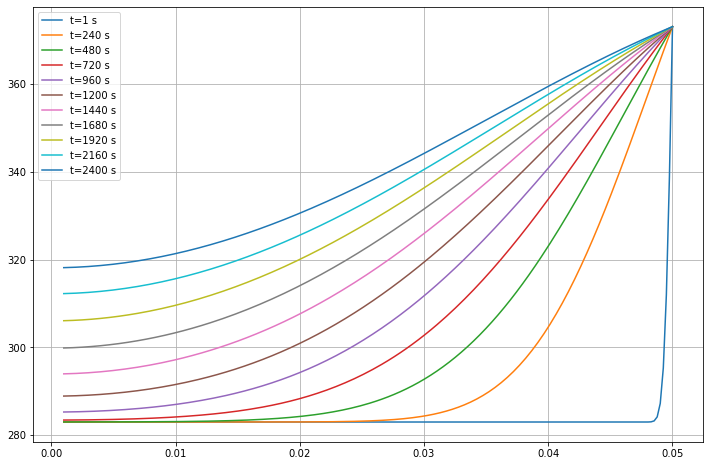

In [22]:
timespan=np.linspace(1,2400,11)

plt.figure(figsize=(12,8))

for t in timespan:
    T=CalcTemp(r,t,Tb=373, T0=283, R=R)
    LabelString=('t=%i s' % int(t))
    plt.plot(r,T,label=LabelString);

plt.legend()
plt.grid(True)
plt.show()
    

## Approximate analytical solutions for the cooking time $t_E$

In this section, we outline two approximations: 
- an approximation of the general solution to yield an analytical approximation of cooking time $t_E$, 
- and an approximation of the shape of egg as a sphere. 


Although the general solution is given in terms of the theta function which is an infinite series, terms higher than a certain order are negligible due to the damping provided by the $n^2$ dependence of the exponential factor. By neglecting the higher order terms of the series, and solving the resulting equation, the **cooking time** $t_E$ can be approximated analytically. 


It is also convenient to be able to calculate it given the value of $T_c$ (temperature at the center of the egg) necessary for the egg to be cooked, although it can be obtained from equation (5) through plotting graphs such as figure 1.

$$t_E \approx \frac{R^2}{\pi^2 \alpha} \ln \left[ \frac{2\, (T_b-T_0)}{T_b-T_c} \right]$$


A similar derivation was done by Williams [7]. His result (which we have adapted for comparison purposes) was

$$t_E \approx \frac{R^2}{\pi^2 \alpha} \ln \left[ \frac{0.76\, (T_b-T_0)}{T_b-T_c} \right]$$

The difference in the results is due to the difference in the interpretation of a cooked egg:
he considered an egg is cooked *when the boundary of the yolk reaches a certain temperature*
while we consider an egg is cooked *when the centre of the yolk reaches a certain temperature*.



# Numerical Solution 

## The 1D diffusion equation¶
The famous diffusion equation, also known as the heat equation,
reads


$$\frac{\partial u}{\partial t} =
{\alpha} \frac{\partial^2 u}{\partial x^2},$$

where $u(x,t)$ is the unknown function to be solved for, $x$ is a coordinate
in space, and $t$ is time. The coefficient ${\alpha}$ is the diffusion
coefficient and determines how fast $u$ changes in time. A quick
short form for the diffusion equation is $u_t = {\alpha} u_{xx}$.

- Typical diffusion problems may experience **rapid change in the very beginning**, but then the evolution of $u$ becomes slower and slower.
- The solution is usually **very smooth**, and after some time, one cannot recognize the initial shape of $u$. 
- The diffusion equation converges to **a stationary solution** $\bar u(x)$ as $t\rightarrow\infty$. 
- In this limit, $u_t=0$, and $\bar u$ is governed by $\bar u''(x)=0$.
- This stationary limit of the diffusion equation is called the **Laplace equation** and arises in a very wide range of applications throughout the sciences.

It is possible to solve for $u(x,t)$ using a explicit scheme. Since the solution $u$ of the diffusion equation is very smooth and changes slowly, small time steps are not convenient and not required by accuracy as the diffusion process converges to a stationar state.





### The initial-boundary value problem for 1D diffusion¶

To obtain a unique solution of the diffusion equation, or equivalently,
to apply numerical methods, we need initial and boundary conditions. 
The diffusion equation goes with one initial condition $u(x,0)=I(x)$, where $I$ is a prescribed function. One boundary condition is required at each point on the boundary, which in 1D means that $u$ must be known, $u_x$ must be known, or some combination of them.

- We shall start with the simplest boundary condition: $u=0$. 
- The complete initial-boundary value diffusion problem in one space dimension can then be specified as


$$\tag{1}
\frac{\partial u}{\partial t} =
    {\alpha} \frac{\partial^2 u}{\partial x^2}, \quad x\in (0,L),\ t\in (0,T]$$

$$\tag{2}
u(x,0) = I(x), \quad  x\in [0,L]$$


$$\begin{align}\tag{3}
u(0,t)  = 0, \quad  t>0,\end{align}$$


$$\begin{align}\tag{4}
u(L,t)  = 0, \quad  t>0{\thinspace .}\end{align}$$

Equation (1) is known as a one-dimensional diffusion equation, also often referred to as a
heat equation. With only a first-order derivative in time,
only one initial condition is needed, while the second-order
derivative in space leads to a demand for two boundary conditions.
The parameter ${\alpha}$ must be given and is referred to as the
diffusion coefficient.
Diffusion equations like (1) have a wide range of
applications throughout physical, biological, and financial sciences.
One of the most common applications is propagation of heat, where
$u(x,t)$ represents the temperature of some substance at point $x$ and
time $t$.

### Forward Euler scheme¶

The first step in the discretization procedure is to replace the domain $[0,L]\times [0,T]$ by a set of mesh points. Here we apply equally spaced mesh points

$$x_i=i\Delta x,\quad i=0,\ldots,N_x,$$

and

$$t_n=n\Delta t,\quad n=0,\ldots,N_t {\thinspace .}$$

Moreover, $u^n_i$ denotes the mesh function that approximates $u(x_i,t_n)$ for $i=0,\ldots,N_x$ and $n=0,\ldots,N_t$.
Requiring the PDE (1) to be fulfilled at a mesh point $(x_i,t_n)$ leads to the equation

$$\tag{5}
\frac{\partial}{\partial t} u(x_i, t_n) =
    {\alpha}\frac{\partial^2}{\partial x^2} u(x_i, t_n),$$

The next step is to replace the derivatives by finite difference approximations.
The computationally simplest method arises from
using a forward difference in time and a central difference in
space:


$$\tag{6}
[D_t^+ u = {\alpha} D_xD_x u]^n_i {\thinspace .}$$

Written out,


$$\tag{7}
\frac{u^{n+1}_i-u^n_i}{\Delta t} = {\alpha} \frac{u^{n}_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2} {\thinspace .}$$

We have turned the PDE into algebraic equations, also often called
discrete equations. The key property of the equations is that they
are algebraic, which makes them easy to solve.
As usual, we anticipate that $u^n_i$ is already computed such that
$u^{n+1}_i$ is the only unknown in (7).
Solving with respect to this unknown is easy:


$$\tag{8}
u^{n+1}_i = u^n_i + F\left(
    u^{n}_{i+1} - 2u^n_i + u^n_{i-1}\right){\thinspace .}$$


$F$ is the key parameter in the discrete diffusion equation
Note that $F$ is a dimensionless number that lumps the key physical
parameter in the problem, ${\alpha}$, and the discretization parameters
$\Delta x$ and $\Delta t$ into a single parameter. All the properties
of the numerical method are critically dependent upon the value of
$F$.

The computational algorithm then becomes


compute $u^0_i=I(x_i)$for $i=0,\ldots,N_x$
for $n=0,1,\ldots,N_t$:

apply (8) for all the internal
spatial points $i=1,\ldots,N_x-1$
set the boundary values
$u^{n+1}_i=0$ for $i=0$ and $i=N_x$

The algorithm is compactly fully specified in Python:


In [68]:
import numpy as np

L=1
T=10
Nx=100
Nt=3000
a=0.01

In [69]:
def Initial(x):
    #definition of the initial temperature (smooth)
    return np.sin(x)

x   = np.linspace(0, L, Nx+1)    # mesh points in space
dx  = x[1] - x[0]
t   = np.linspace(0, T, Nt+1)    # mesh points in time
dt  = t[1] - t[0]
F   = a*dt/dx**2                 # Courant–Friedrichs–Lewy condition
print('Courant–Friedrichs–Lewy condition: %f' % F)

u   = np.zeros((Nx+1,))          # unknown u at new time level
u_1 = np.zeros((Nx+1,))          # u at the previous time level

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = Initial(x[i])


Courant–Friedrichs–Lewy condition: 0.333333


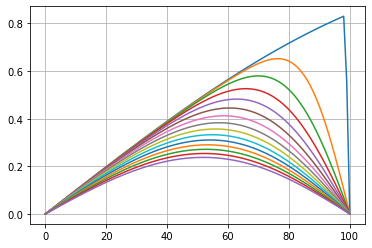

In [70]:
for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        u[i] = u_1[i] + F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])

    # Insert boundary conditions
    u[0] = 0;  u[Nx] = 0

    # Update u_1 before next step
    u_1[:]= u
    
    if n%200==1:
        plt.plot(u)
    plt.grid(True)

The program `diffu1D_u0.py` contains a function solver_FE for solving the 1D diffusion equation with $u=0$ on the boundary. The functions plug and gaussian runs the case with $I(x)$ as a discontinuous plug or a smooth Gaussian function, respectively. Experiments with these two functions reveal some important observations:

- The Forward Euler scheme leads to growing solutions if $F>\frac{1}{2}$.



## Diffusion equation in axi-symmetric geometries¶

Suppose we have a diffusion process taking care in a straight tube
with radius $R$. We assume axi-symmetry such that $u$ is just a
function of $r$ and $t$. A model problem is


$$\tag{72}
\frac{\partial u}{\partial t} = \frac{1}{r}\frac{\partial}{\partial r}
    \left(r{\alpha}(r)\frac{\partial u}{\partial r}\right) + f(t),  r\in (0,R),\ t\in (0,T],$$



$$\tag{73}
\frac{\partial u}{\partial r}(0,t) = 0,  t\in (0,T],$$



$$\tag{74}
u(R,t) = 0,  t\in (0,T],$$



$$\tag{75}
u(r,0) = I(r),  r\in [0,R].$$

The condition (73) is a necessary symmetry condition
at $r=0$, while (74) could be any Dirichlet
or Neumann condition (or Robin condition in case of cooling or heating).
The finite difference approximation at $r=0$ of the spatial derivative term
is the only new challenge in this problem. Let us in case of
constant ${\alpha}$ expand the derivative to


$$\frac{\partial^2 u}{\partial r^2} + \frac{1}{r}\frac{\partial u}{\partial r}{\thinspace .}$$

The last term faces a difficulty at $r=0$ since it becomes a $0/0$ expression
because of the symmetry condition.
L’Hosptial’s rule can be used:


$$\lim_{r\rightarrow 0} \frac{1}{r}\frac{\partial u}{\partial r}
= \lim_{r\rightarrow 0} \frac{\partial^2 u}{\partial r^2}{\thinspace .}$$

The PDE at $r=0$ therefore becomes


$$\tag{76}
\frac{\partial u}{\partial t} = 2{\alpha}\frac{\partial^2 u}{\partial r^2}
    + f(t){\thinspace .}$$

For a variable coefficient ${\alpha}(r)$ the expanded derivative reads


$${\alpha}(r)\frac{\partial^2 u}{\partial r^2} +
\frac{1}{r}({\alpha}(r) + r{\alpha}'(r))\frac{\partial u}{\partial r}{\thinspace .}$$

We have that the limit of a product is


$$\lim_{r\rightarrow 0}
\frac{1}{r}({\alpha}(r) + r{\alpha}'(r))\frac{\partial u}{\partial r} =
\lim_{r\rightarrow 0} ({\alpha}(r) + r{\alpha}'(r))\
\lim_{x\rightarrow c}
\frac{1}{r}\frac{\partial u}{\partial r}{\thinspace .}$$

The second limit becomes as above, so the PDE at $r=0$,
assuming $({\alpha}(0) + r{\alpha}'(0))\neq 0$,
looks like


$$\tag{77}
\frac{\partial u}{\partial t} = (2{\alpha} + r{\alpha}')
    \frac{\partial^2 u}{\partial r^2}
    + f(t){\thinspace .}$$

The second-order derivative is discretized in the usual way.
Consider first constant ${\alpha}$:


$$2{\alpha}\frac{\partial^2}{\partial r^2}u(r_0,t_n) \approx
[2{\alpha} 2D_rD_r u]^n_0 =
2{\alpha} \frac{u^{n}_{1} - 2u^{n}_0 + u^n_{-1}}{\Delta r^2}{\thinspace .}$$

The fictitious value $u^n_{-1}$ can be eliminated using the discrete
symmetry condition


$$[D_{2r} u =0]^n_0 \quad\Rightarrow\quad u^n_{-1} = u^n_1,$$

which then gives the modified approximation to the second-order derivative
of $u$ in $r$ at $r=0$:


$$\tag{78}
4{\alpha} \frac{u^{n}_{1} - u^{n}_0}{\Delta r^2}{\thinspace .}$$

With variable ${\alpha}$ we simply get


$$(2{\alpha} + r{\alpha}')2D_rD_r u]^n_0 =
(2{\alpha}(0) + r{\alpha}'(0)) \frac{u^{n}_{1} - 2u^{n}_0 + u^n_{-1}}{\Delta r^2}{\thinspace .}$$

The discretization of the second-order derivative in $r$ at another
internal mesh point is straightforward:


$$\left.\frac{1}{r}\frac{\partial}{\partial r}
\left(r{\alpha}\frac{\partial u}{\partial r}\right)\right\vert_{r=r_i}^{t=t_n}
\approx [r^{-1} D_r (r {\alpha} D_r u)]_i^n
= \frac{1}{\Delta r^2}\left(
r_{i+\frac{1}{2}}{\alpha}_{i+\frac{1}{2}}(u_{i+1}^n - u_i^n) - r_{i-\frac{1}{2}}{\alpha}_{i-\frac{1}{2}}(u_{i}^n - u_{i-1}^n)\right){\thinspace .}$$

$\theta$-rule in time...


## Diffusion equation in spherically-symmetric geometries¶

### Discretization in spherical coordinates¶

Let us now pose the problem from the section Diffusion equation in axi-symmetric geometries
in spherical coordinates, where $u$ only depends on the radial coordinate
$r$ and time $t$. That is, we have spherical symmetry.
For simplicity we restrict the diffusion coefficient ${\alpha}$ to be
a constant. The PDE reads


$$\tag{79}
\frac{\partial u}{\partial t} = \frac{{\alpha}}{r^\gamma}\frac{\partial}{\partial r}
    \left(r^\gamma\frac{\partial u}{\partial r}\right) + f(t),$$

for $r\in (0,R)$ and $t\in (0,T]$. The parameter $\gamma$ is 2 for
spherically-symmetric problems and 1 for axi-symmetric problems.
The boundary and initial conditions
have the same mathematical form as
in (72)-(75).
Since the PDE in spherical coordinates has the same form as the PDE
in the section Diffusion equation in axi-symmetric geometries, just with the $\gamma$ parameter
being different, we can use the same discretization approach.
At the origin $r=0$ we get problems with the term


$$\frac{\gamma}{r}\frac{\partial u}{\partial t},$$

but L’Hosptial’s rule shows that this term equals $\gamma\partial^2 u/
\partial r^2$, and the PDE at $r=0$ becomes


$$\tag{80}
\frac{\partial u}{\partial t} = (\gamma+1){\alpha}\frac{\partial^2 u}{\partial r^2}
    + f(t){\thinspace .}$$

Same discretization, write up with $\gamma$.


#### Discretization in Cartesian coordinates¶

The spherically-symmetric spatial derivative can be transformed to
the Cartesian counterpart by introducing


$$v(r,t) = ru(r,t){\thinspace .}$$

Inserting $u=v/r$ in the PDE yields


$$\frac{1}{r^2}\frac{\partial}{\partial r}
\left({\alpha}(r)r^2\frac{\partial u}{\partial t}\right),$$

and then


$$r\left(\frac{d c^2}{dr}\frac{\partial v}{\partial r} +
{\alpha}\frac{\partial^2 v}{\partial r^2}\right) - \frac{d c^2}{dr}v
{\thinspace .}$$

The two terms in the parenthesis can be combined to


$$r\frac{\partial}{\partial r}\left( {\alpha}\frac{\partial v}{\partial r}\right),$$

which is recognized as the variable-coefficient Laplace operator in
one Cartesian coordinate.



In [112]:
import numpy as np

Tb=373
T0=293

R=0.05
T=1200
Nx=100
Nt=5000
alpha=0.0000004



In [113]:
def SetInitialCondition(Nx,Tb,T0):
    #definition of the initial temperature (smooth)
    u0=np.ones(Nx+1,)*T0
    u0[Nx]=Tb
    return u0

r   = np.linspace(0, R, Nx+1)    # mesh points in space
dr  = r[1]-r[0]
t   = np.linspace(0, T, Nt+1)    # mesh points in time
dt  = t[1] - t[0]

F=dt*alpha/(dr**2)
print('Frechet number: %f' % F)

u   = np.zeros((Nx+1,))          # unknown u at new time level
u_1 = np.zeros((Nx+1,))          # u at the previous time level



Frechet number: 0.384000


$$\frac{u^{n+1}_i-u^n_i}{\Delta t} = \frac{1}{\Delta r^2}\left(
r_{i+\frac{1}{2}}{\alpha}_{i+\frac{1}{2}}(u_{i+1}^n - u_i^n) - r_{i-\frac{1}{2}}{\alpha}_{i-\frac{1}{2}}(u_{i}^n - u_{i-1}^n)\right){\thinspace .}$$

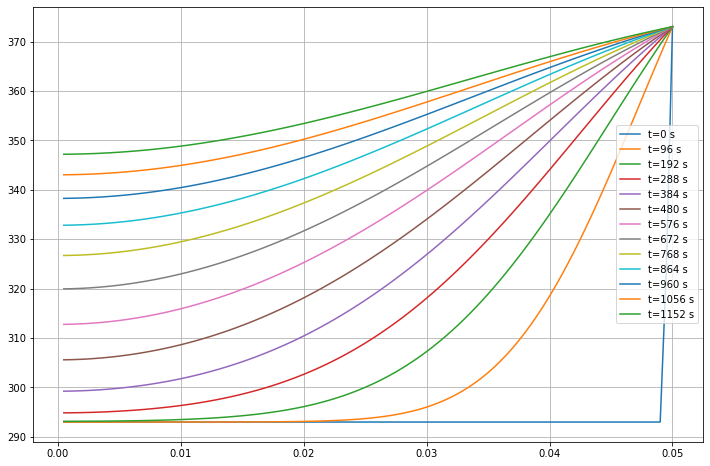

In [116]:
# Set initial condition u(x,0) = I(x)
u_1=SetInitialCondition(Nx,Tb,T0)
plt.figure(figsize=(12,8))
for n in range(0, Nt):
    
    # Compute u at inner mesh points
    for i in range(1, Nx):
        if i==0:
            u[i] = u_1[i]+6*F*(u_1[i+1]-u_1[i])
        else:
            a1=1/r[i]*(r[i+1]*u_1[i+1]-2*r[i]*u_1[i]+r[i-1]*u_1[i-1])
            u[i] = u_1[i] +  F*a1
            
    # Insert boundary conditions
    u[Nx] = Tb

    # Update u_1 before next step
    u_1[:]= u
    
    if n%400==0 or n==0:
        plt.plot(r[1:],u[1:],label=('t=%i s' % t[n]))
    plt.grid(True)
    plt.legend()


# Variable conductivity, density or specific heat capacity

Frechet number: 0.096000


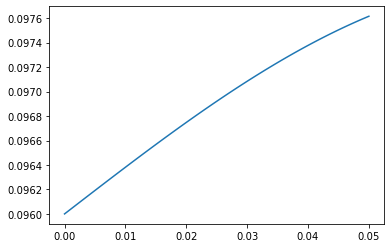

In [138]:
alpha=0.0000001
a=alpha*(1+0.02*np.sin(r/R))
A=dt*a/(dr**2)
print('Frechet number: %f' % A[0])

u   = np.zeros((Nx+1,))          # unknown u at new time level
u_1 = np.zeros((Nx+1,))          # u at the previous time level

plt.figure()
plt.plot(r,A);

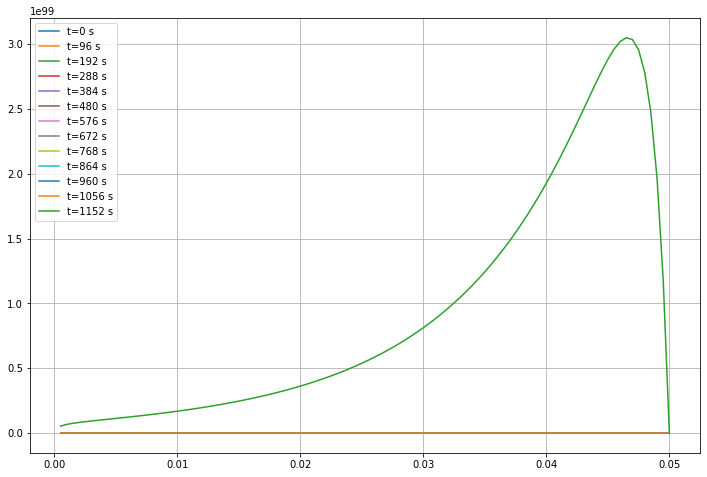

In [139]:
# Set initial condition u(x,0) = I(x)
u_1=SetInitialCondition(Nx,Tb,T0)
plt.figure(figsize=(12,8))
for n in range(0, Nt):
    
    # Compute u at inner mesh points
    for i in range(1, Nx):
        if i==0:
            u[i] = u_1[i]+6*A[0]*(u_1[i+1]-u_1[i])
        else:
            a1=A[i]/r[i]*(r[i+1]*u_1[i+1]-2*r[i]*u_1[i]+r[i-1]*u_1[i-1])
            a2=A[i+1]/4*(u_1[i+1] + u_1[i-1])
            a3=A[i-1]/4*(u_1[i-1] - u_1[i+1])
            u[i] = u_1[i] + a1 + a2 + a3
            
    # Insert boundary conditions
    #u[0] = 0;  
    u[Nx] = Tb

    # Update u_1 before next step
    u_1[:]= u
    
    if n%400==0 or n==0:
        plt.plot(r[1:],u[1:],label=('t=%i s' % t[n]))
    plt.grid(True)
    plt.legend()



## Appendix: Backward Euler scheme (implicit)¶

We now apply a backward difference in time in (5),
but the same central difference in space:


$$\tag{9}
[D_t^- u = D_xD_x u]^n_i,$$

which written out reads


$$\tag{10}
\frac{u^{n}_i-u^{n-1}_i}{\Delta t} = {\alpha}\frac{u^{n}_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2} {\thinspace .}$$

Now we assume $u^{n-1}_i$ is computed, but all quantities at the “new”
time level $n$ are unknown. This time it is not possible to solve
with respect to $u_i^{n}$ because this value couples to its neighbors
in space, $u^n_{i-1}$ and $u^n_{i+1}$, which are also unknown.
Let us examine this fact for the case when $N_x=3$. Equation (10) written for $i=1,\ldots,Nx-1= 1,2$ becomes


$$\tag{11}
\frac{u^{n}_1-u^{n-1}_1}{\Delta t} = {\alpha}\frac{u^{n}_{2} - 2u^n_1 + u^n_{0}}{\Delta x^2}$$



$$\tag{12}
\frac{u^{n}_2-u^{n-1}_2}{\Delta t} = {\alpha}\frac{u^{n}_{3} - 2u^n_2 + u^n_{1}}{\Delta x^2}$$

The boundary values $u^n_0$ and $u^n_3$ are known as zero. Collecting the
unknown new values $u^n_1$ and $u^n_2$ on the left-hand side gives


$$\tag{13}
\left(1+  2F\right) u^{n}_1 - F u^{n}_{2}    = u^{n-1}_1,$$



$$\tag{14}
- F u^{n}_{1} + \left(1+  2F\right) u^{n}_2  = u^{n-1}_2{\thinspace .}$$

This is a coupled $2\times 2$ system of algebraic equations for
the unknowns $u^n_1$ and $u^n_2$. The equivalent matrix form is


$$\begin{split}\left(\begin{array}{cc}
1+  2F &   - F\\
- F    & 1+  2F
\end{array}\right)
\left(\begin{array}{c}
u^{n}_1\\
u^{n}_{2}\\
\end{array}\right)
=
\left(\begin{array}{c}
u^{n-1}_1\\
u^{n-1}_2
\end{array}\right)\end{split}$$




Implicit vs. explicit methods
Discretization methods that lead to a coupled system of equations
for the unknown function at a new time level are said to be
implicit methods.
The counterpart, explicit methods, refers to discretization
methods where there is a simple explicit formula for the values of
the unknown function at each of the spatial mesh points at the new
time level. From an implementational point of view, implicit methods
are more comprehensive to code since they require
the solution of coupled equations, i.e., a matrix system, at each time level.

In the general case, (10) gives rise to
a coupled $(Nx-1)\times (Nx-1)$ system of algebraic equations for
all the unknown $u^n_i$ at the interior spatial points $i=1,\ldots,Nx-1$.
Collecting the unknowns on the left-hand side,
(10) can be written


$$\tag{15}
- F u^n_{i-1} + \left(1+  2F \right) u^{n}_i - F u^n_{i+1} =
    u_{i-1}^{n-1},$$

for $i=1,\ldots,Nx-1$. Here,
we have introduced the mesh Fourier number


$$\tag{16}
F = {\alpha}\frac{\Delta t}{\Delta x^2}{\thinspace .}$$

One can either view these equations as a system for where the
$u^{n}_i$ values at the internal mesh points, $i=1,\ldots,N_x-1$, are
unknown, or we may append the boundary values $u^n_0$ and $u^n_{N_x}$
to the system. In the latter case, all $u^n_i$ for $i=0,\ldots,N_x$
are unknown and we must add the boundary equations to
the $N_x-1$ equations in (15):


$$\tag{17}
u_0^n = 0,$$



$$\tag{18}
u_{N_x}^n = 0{\thinspace .}$$

A coupled system of algebraic equations can be written on matrix form,
and this is important if we want to call up ready-made software for
solving the system.  The equations (15)
and (17)–(18)
correspond to the matrix equation


$$AU = b$$

where $U=(u^n_0,\ldots,u^n_{N_x})$, and
the matrix $A$ has the following structure:


$$\begin{equation}\tag{19}
A =
    \left(
    \begin{array}{cccccccccc}
    A_{0,0} & A_{0,1} & 0
    &\cdots &
    \cdots & \cdots & \cdots &
    \cdots & 0 \\
    A_{1,0} & A_{1,1} & 0 & \ddots &   & &  & &  \vdots \\
    0 & A_{2,1} & A_{2,2} & A_{2,3} &
    \ddots & &  &  & \vdots \\
    \vdots & \ddots &  & \ddots & \ddots & 0 &  & & \vdots \\
    \vdots &  & \ddots & \ddots & \ddots & \ddots & \ddots & & \vdots \\
    \vdots & &  & 0 & A_{i,i-1} & A_{i,i} & A_{i,i+1} & \ddots & \vdots \\
    \vdots & & &  & \ddots & \ddots & \ddots &\ddots  & 0 \\
    \vdots & & & &  &\ddots  & \ddots &\ddots  & A_{N_x-1,N_x} \\
    0 &\cdots & \cdots &\cdots & \cdots & \cdots  & 0 & A_{N_x,N_x-1} & A_{N_x,N_x}
    \end{array}
    \right)\end{equation}$$

The nonzero elements are given by


$$\tag{20}
A_{i,i-1} = -F$$



$$\tag{21}
A_{i,i} = 1+ 2F$$



$$\tag{22}
A_{i,i+1} = -F$$

for the equations for internal points, $i=1,\ldots,N_x-1$. The equations
for the boundary points correspond to


$$\tag{23}
A_{0,0} = 1,$$



$$\tag{24}
A_{0,1} = 0,$$



$$\tag{25}
A_{N_x,N_x-1} = 0,$$



$$\tag{26}
A_{N_x,N_x} = 1{\thinspace .}$$

The right-hand side $b$ is written as


$$\begin{equation}\tag{27}
b = \left(\begin{array}{c}
    b_0\\
    b_1\\
    \vdots\\
    b_i\\
    \vdots\\
    b_{N_x}
    \end{array}\right)\end{equation}$$

with


$$\tag{28}
b_0 = 0,$$



$$\tag{29}
b_i = u^{n-1}_i,\quad i=1,\ldots,N_x-1,$$



$$\tag{30}
b_{N_x} = 0 {\thinspace .}$$

We observe that the matrix $A$ contains quantities that do not change
in time. Therefore, $A$ can be formed once and for all before we enter
the recursive formulas for the time evolution.
The right-hand side $b$, however, must be updated at each time step.
This leads to the following computational algorithm, here sketched
with Python code:

